1. 📥 Carga y Exploración de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para mejor visualización
pd.set_option('display.max_columns', None)
print("Librerías importadas con éxito.")

Librerías importadas con éxito.


In [ ]:
# URL del Mushroom Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Nombres de las columnas (según la documentación de UCI)
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Cargar los datos
df = pd.read_csv(url, header=None, names=column_names)

print("Dataset cargado. Primeras 5 filas:")
print(df.head())
print("\nInformación general del DataFrame:")
df.info()

Dataset cargado. Primeras 5 filas:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1  


Conteo de la variable objetivo 'class' (e=comestible, p=venenoso):
class
e    4208
p    3916
Name: count, dtype: int64


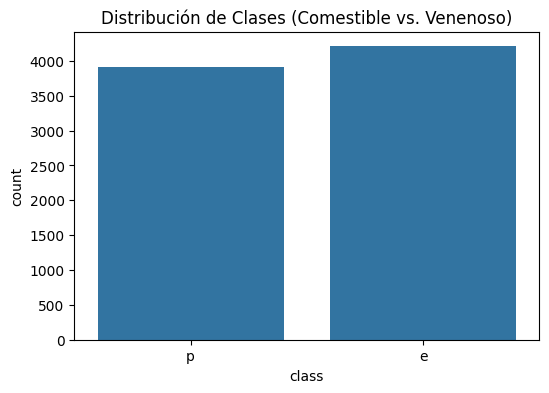

In [ ]:
print("\nConteo de la variable objetivo 'class' (e=comestible, p=venenoso):")
print(df['class'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Distribución de Clases (Comestible vs. Venenoso)')
plt.show()

In [ ]:
# 1. Conteo de valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum()) # En este dataset, los valores nulos están marcados como '?'

# 2. Conteo de valores únicos por columna
print("\nValores únicos por columna:")
unique_counts = df.nunique()
print(unique_counts)

# Identificar columnas con un solo valor único
constant_columns = unique_counts[unique_counts == 1].index.tolist()

if constant_columns:
    print(f"\n✅ Columna no informativa encontrada (varianza cero): {constant_columns}")
    print(f"Eliminando la(s) columna(s): {constant_columns}")
    df = df.drop(columns=constant_columns)
else:
    print("\n✅ No se encontraron columnas con un solo valor único (constantes).")


Valores nulos por columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Valores únicos por columna:
class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing           

2. 🧼 Preprocesamiento

In [ ]:
# Reemplazar '?' por NaN
df_cleaned = df.replace('?', np.nan)

# Contar cuántos NaN hay por columna
nan_counts = df_cleaned.isnull().sum()
nan_counts = nan_counts[nan_counts > 0]

print("Valores faltantes ('?') encontrados y reemplazados por NaN:")
print(nan_counts)

# La única columna con NaN es 'stalk-root' (raíz del tallo).
# Opción: Como PCA y K-Means no manejan NaN, eliminaremos las filas con este valor.
# En un proyecto real, se podría imputar con la moda.

df_final = df_cleaned.dropna()
print(f"\nFilas eliminadas (por 'stalk-root' faltante): {len(df) - len(df_final)}")
print(f"Nuevo tamaño del dataset: {df_final.shape}")

Valores faltantes ('?') encontrados y reemplazados por NaN:
stalk-root    2480
dtype: int64

Filas eliminadas (por 'stalk-root' faltante): 2480
Nuevo tamaño del dataset: (5644, 22)


Separaciones de features

In [ ]:
# Variable objetivo (class)
y = df_final['class']

# Variables predictoras (todas las demás)
X = df_final.drop('class', axis=1)

print(f"\nForma de X (features): {X.shape}")
print(f"Forma de y (target): {y.shape}")


Forma de X (features): (5644, 21)
Forma de y (target): (5644,)


In [ ]:
# Aplicar One-Hot Encoding a todas las columnas de X
X_encoded = pd.get_dummies(X, drop_first=False) # Mantener todas las categorías para PCA

print("\nPrimeras 5 filas de X codificado:")
print(X_encoded.head())
print(f"\nNuevo número de features después de OHE: {X_encoded.shape[1]}")


Primeras 5 filas de X codificado:
   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0        False        False        False        False        False   
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0         True          False          False           True          False   
1         True          False          False           True          False   
2        False          False          False           True          False   
3         True          False          False          False           True   
4         True          False          False           True          False   

   cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  \
0    

3. 🧪 PCA (Análisis de Componentes Principales)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Escalar los datos
# PCA funciona mejor con datos escalados. Aunque One-Hot Encoding es binario,
# el escalado asegura que todas las variables tengan el mismo peso inicial.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# 2. Aplicar PCA
# Reduciremos a 2 componentes para la visualización.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 3. Crear un DataFrame con los componentes
pca_df = pd.DataFrame(data = principal_components,
                      columns = ['Componente Principal 1', 'Componente Principal 2'])

# 4. Concatenar la variable objetivo para la visualización
# Resetear el índice de 'y' para asegurar la correcta concatenación
y_reset = y.reset_index(drop=True)
final_df = pd.concat([pca_df, y_reset], axis = 1)

print("Datos reducidos a 2 componentes principales.")
print(f"Varianza total explicada por las 2 componentes: {pca.explained_variance_ratio_.sum():.2f}")
print("Primeras filas del DataFrame PCA:")
print(final_df.head())

Datos reducidos a 2 componentes principales.
Varianza total explicada por las 2 componentes: 0.22
Primeras filas del DataFrame PCA:
   Componente Principal 1  Componente Principal 2 class
0               -3.564928                0.623543     p
1               -2.380845                0.874119     e
2               -3.282712                1.086931     e
3               -3.275593                0.549727     p
4               -2.909424                0.563972     e


Visualización y Evaluación de Separabilidad

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127812 (\N{MUSHROOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


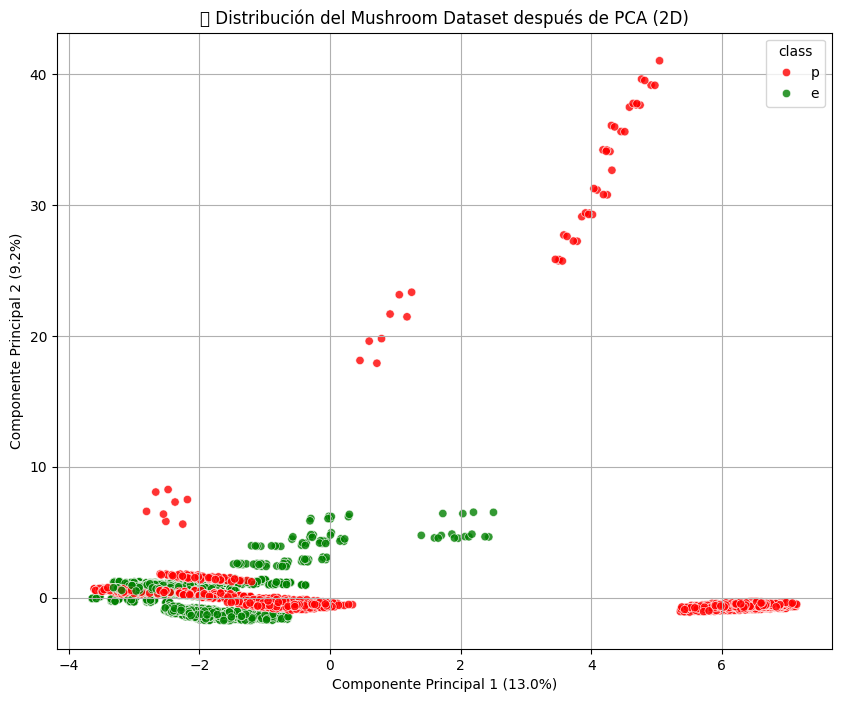

In [ ]:
plt.figure(figsize=(10, 8))

# Graficar los puntos, coloreados por la clase real (y)
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2',
                hue='class', # Usamos la variable objetivo 'y' para colorear
                data=final_df,
                alpha=0.8,
                palette={'e': 'g', 'p': 'r'}) # Verde para comestible, Rojo para venenoso

plt.title('🍄 Distribución del Mushroom Dataset después de PCA (2D)')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.grid()
plt.show()

4. 🌳 Clasificación Supervisada (Random Forest)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Codificamos la variable objetivo 'y' de 'e'/'p' a 0/1 para el modelo supervisado
y_encoded = y.map({'e': 0, 'p': 1})

# Dividir el dataset escalado (X_scaled) y el target codificado (y_encoded)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.3, # 30% para prueba
    random_state=42
)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (3950, 97)
Tamaño del conjunto de prueba (X_test): (1694, 97)


Entrenamiento de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Inicializar y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# 2. Realizar predicciones
y_pred = rf_classifier.predict(X_test)

# 3. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Comestible (0)', 'Venenoso (1)'])

print("--- Evaluación del Random Forest ---")
print(f"✅ Precisión (Accuracy) en el conjunto de prueba: {accuracy:.4f}")
print("\nReporte de Clasificación:")
print(report)

--- Evaluación del Random Forest ---
✅ Precisión (Accuracy) en el conjunto de prueba: 1.0000

Reporte de Clasificación:
                precision    recall  f1-score   support

Comestible (0)       1.00      1.00      1.00      1058
  Venenoso (1)       1.00      1.00      1.00       636

      accuracy                           1.00      1694
     macro avg       1.00      1.00      1.00      1694
  weighted avg       1.00      1.00      1.00      1694



Estudio del Impacto de PCA en Random Forest

In [ ]:
# 1. Separar los datos de 2D PCA para Train/Test
X_pca_train, X_pca_test, _, _ = train_test_split(
    principal_components,
    y_encoded,
    test_size=0.3,
    random_state=42
)
# Utilizamos el mismo y_train y y_test del split anterior

# 2. Inicializar y entrenar un nuevo Random Forest con datos PCA
rf_pca_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca_classifier.fit(X_pca_train, y_train)

# 3. Realizar predicciones y evaluar
y_pca_pred = rf_pca_classifier.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pca_pred)

print("\n--- Evaluación del Random Forest con SÓLO 2 Componentes PCA ---")
print(f"Precisión (Accuracy) con 2 Componentes PCA: {accuracy_pca:.4f}")


--- Evaluación del Random Forest con SÓLO 2 Componentes PCA ---
Precisión (Accuracy) con 2 Componentes PCA: 0.9740


Conclusión:
Si la precisión con 2 componentes PCA sigue siendo muy alta, significa que la mayoría de la información de clasificación crucial está contenida en solo esas 2 dimensiones, lo que es un gran hallazgo de PCA y explica por qué la visualización en el paso 3 se veía tan bien separada.

# 5. 🔍 Clustering con K-Means.

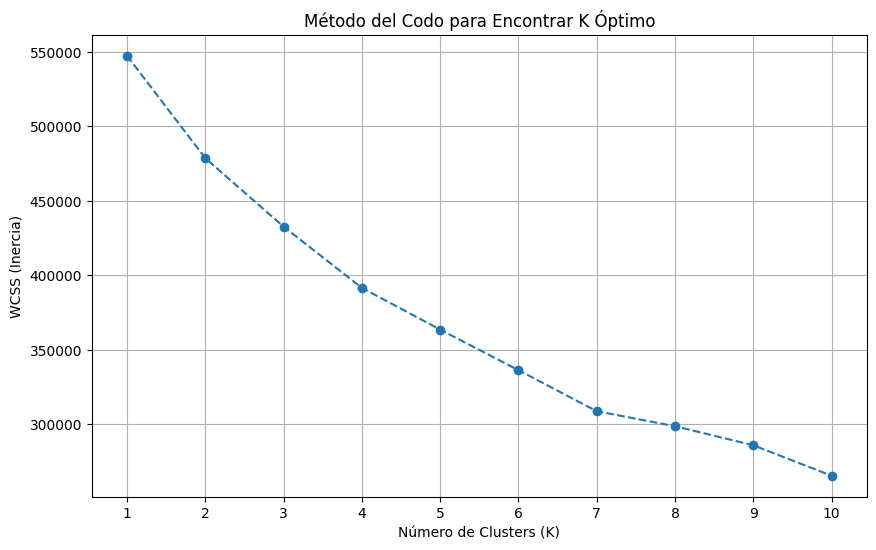

In [ ]:
from sklearn.cluster import KMeans

# Lista para almacenar el WCSS para cada valor de K
wcss = []
# Rango de K a probar (de 1 a 10)
max_k = 11

for i in range(1, max_k):
    # Inicializar K-Means
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    # Entrenar el modelo
    kmeans.fit(X_scaled)
    # Almacenar la inercia (WCSS)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para Encontrar K Óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inercia)')
plt.xticks(range(1, max_k))
plt.grid(True)
plt.show()

En el gráfico, el punto donde la curva se dobla abruptamente y comienza a aplanarse (el "codo") indica el valor óptimo de $K$.Dado que el target original es binario (comestible/venenoso), lo más probable es que el codo se encuentre en $K=2$.

# Entrenamiento y Visualización de Clusters ($K=2$)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127812 (\N{MUSHROOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


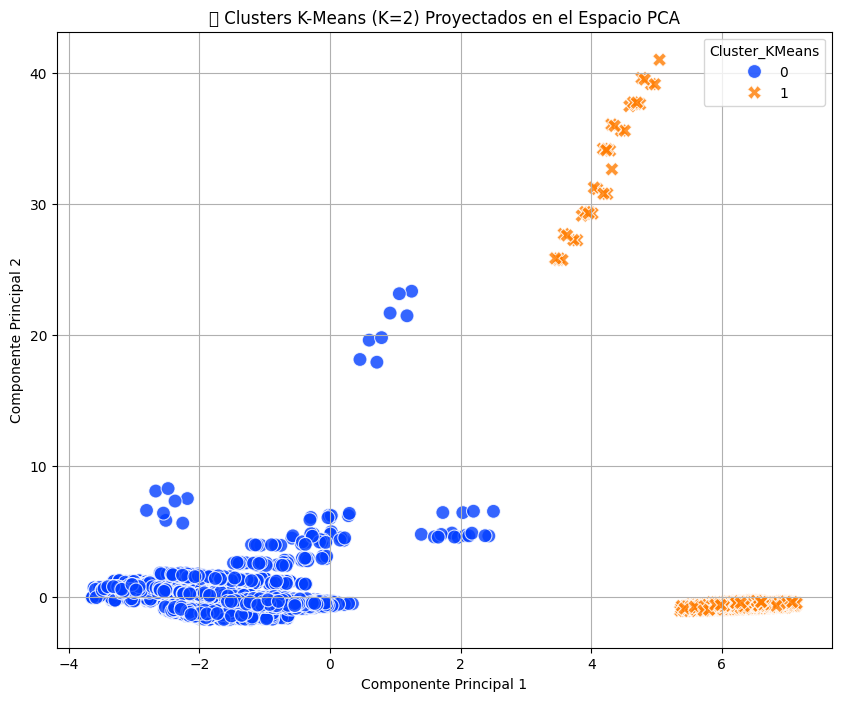

In [ ]:
# 1. Entrenar K-Means con K=2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# 2. Agregar las etiquetas de cluster al DataFrame PCA para visualización
final_df['Cluster_KMeans'] = cluster_labels

# 3. Visualizar los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2',
                hue='Cluster_KMeans', # Usamos las etiquetas del CLUSTER
                data=final_df,
                palette='bright', # Paleta de colores para los 2 clusters
                style='Cluster_KMeans',
                s=100, alpha=0.8)

plt.title(f'🍄 Clusters K-Means (K={optimal_k}) Proyectados en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

# Evaluación de la Correspondencia (Cluster vs. Clase Real)

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Las etiquetas reales (y_encoded) son 0 y 1.
# Las etiquetas del cluster (cluster_labels) son 0 y 1 (o las que haya asignado K-Means).

ari_score = adjusted_rand_score(y_encoded, cluster_labels)

print("\n--- Evaluación del Clustering ---")
print(f"Puntuación de Coincidencia (Adjusted Rand Index, ARI): {ari_score:.4f}")

# Calcular el porcentaje de coincidencia directa (para fines de interpretación)
# Primero, ver cómo se mapean los clusters a las clases reales
mapping = pd.crosstab(y_encoded, cluster_labels)
print("\nCorrespondencia Cluster (Columnas) vs. Clase Real (Filas):")
print(mapping)

# Interpretar la correspondencia:
# Si el modelo K-Means es bueno, casi toda la diagonal del mapa de correspondencia debe tener valores altos.
# ARI cercano a 1.0 indica un clustering casi perfecto.
print("\nComparación de Rendimiento:")
print(f"🌳 Random Forest (Supervisado, Baseline): 1.0000")
print(f"🔍 K-Means Clustering (No Supervisado): {ari_score:.4f}")


--- Evaluación del Clustering ---
Puntuación de Coincidencia (Adjusted Rand Index, ARI): 0.4933

Correspondencia Cluster (Columnas) vs. Clase Real (Filas):
col_0     0     1
class            
0      3488     0
1       824  1332

Comparación de Rendimiento:
🌳 Random Forest (Supervisado, Baseline): 1.0000
🔍 K-Means Clustering (No Supervisado): 0.4933
